In [1]:
import numpy as np
from results_L_4_1000000_N_15 import results as results_4 
from results_L_5_1000000_N_21 import results as results_5_21
from results_L_5_1000000_N_22 import results as results_5_22
from results_L_6_500000_N_33 import results as results_6
from results_L_7_50000_N_71 import results as results_7
from results_L_8_12000_N_132 import results as results_8_132

from results_L_8_9000_N_132 import results as results_8_132_partial_9000

from matplotlib.pyplot import *

In [158]:
results = [results_4, results_5_21, results_6, results_7, results_8_132]
N = [15,21,33,71,132]
maxiter = [1_000_000, 1_000_000, 500_000, 50_000, 12_000]
first_L = 4

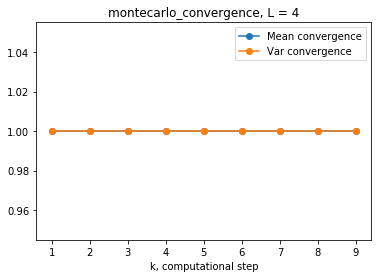

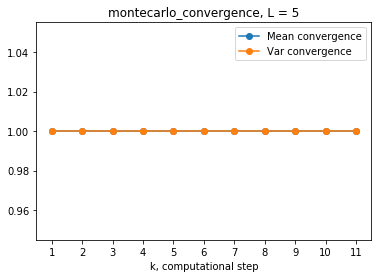

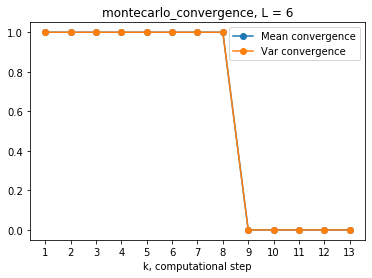

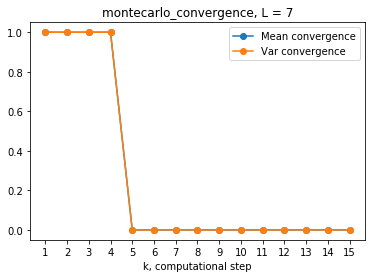

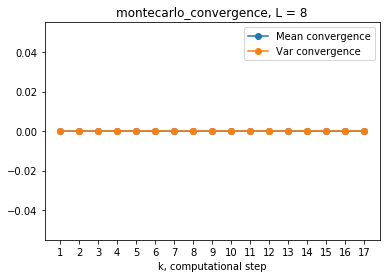

In [4]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [interesting[k][0][0] for k in range(len(interesting))], "-o", label="Mean convergence")
    plot(x, [interesting[k][0][1] for k in range(len(interesting))], "-o", label="Var convergence")
    legend()
    xlabel('k, computational step')
    title('montecarlo_convergence, L = ' + str(i+first_L))
    xticks(x)
    show()

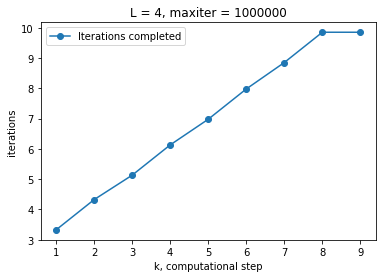

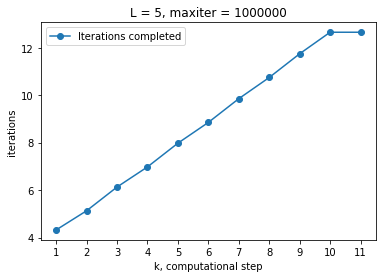

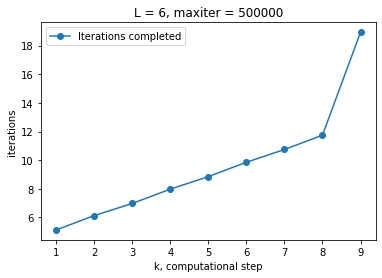

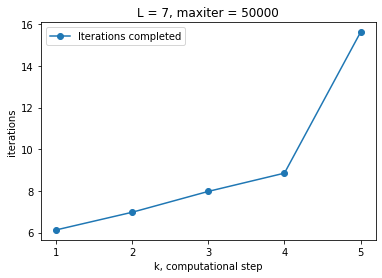

In [16]:
for i in range(5):
    interesting = results[i]
    max_k = 2 * (first_L + i) + 1

    if interesting[-1][0][0]:
        x = range(1,max_k + 1)
        plot(x, np.log2([len(interesting[k][1]) for k in range(len(interesting))]), "-o", label="Iterations completed")
    elif not interesting[0][0][0]:
        continue    
    else:
        first_non_convergence = np.nonzero([not interesting[k][0][0] for k in range(0,max_k)])[0].tolist()[0]
        x = range(1, first_non_convergence + 2)
        plot(x, np.log2([len(interesting[k][1]) for k in range(first_non_convergence + 1)]), "-o", label="Iterations completed")
    legend()
    xlabel('k, computational step')
    ylabel('iterations')
    title('L = '+ str(i+first_L)+ ', maxiter = ' + str(maxiter[i]))
    xticks(x)
    #savefig("iteration_montecarlo_convergence_L="+str(i+5), dpi=300)    
    show()

## Estimate convergence

Text(0, 0.5, 'log2(iterations)')

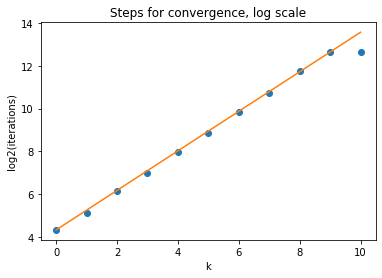

In [24]:
L = 5
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = -1

log_iter = np.log2([len(results[L-first_L][k][1]) for k in range(len(results[L-first_L]))])
plot(range(len(log_iter)), log_iter, 'o')
m = np.mean(np.diff(log_iter[:first_non_convergence]))
q = log_iter[0]
x = np.array(range(max_k))
plot(x, m * x + q)
title("Steps for convergence, log scale")
xlabel("k")
ylabel("log2(iterations)")
#savefig("iterations_convergence_L_5.png", dpi=300)
#print(2 **(m * 10 + q))

## DISTRIBUTIONS PLOT

0


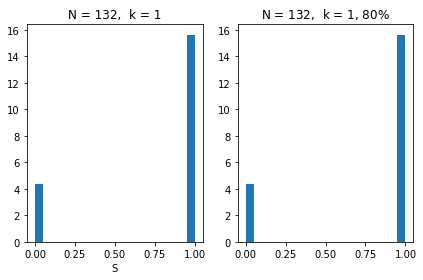

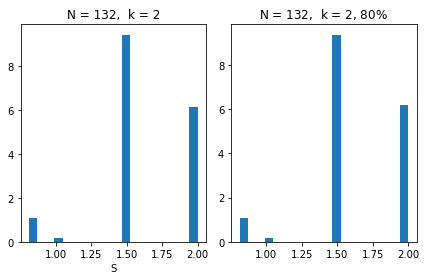

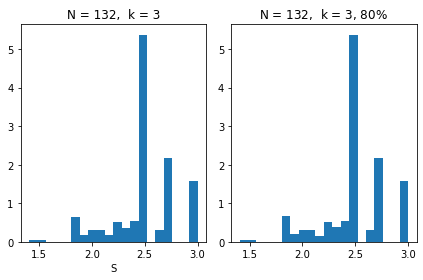

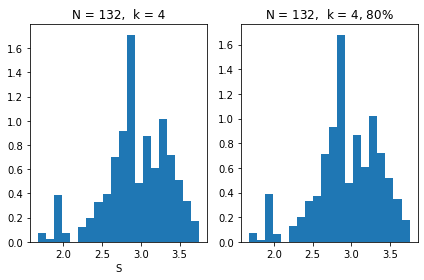

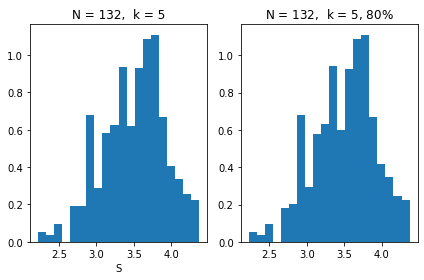

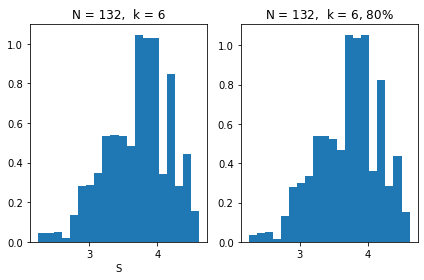

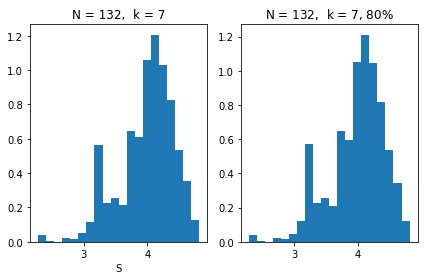

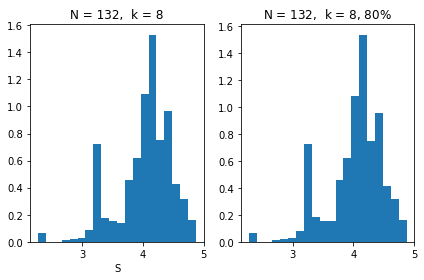

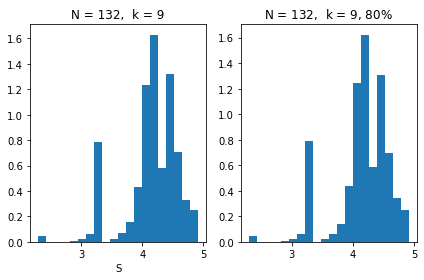

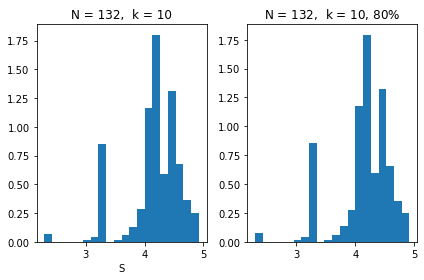

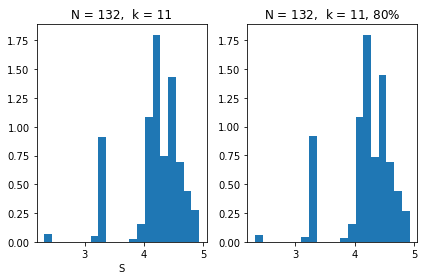

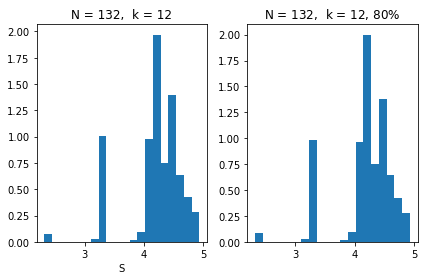

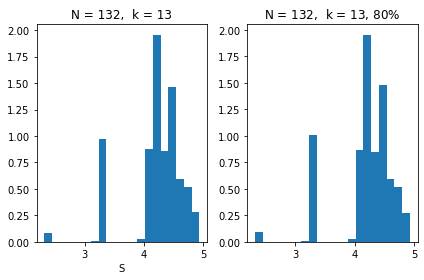

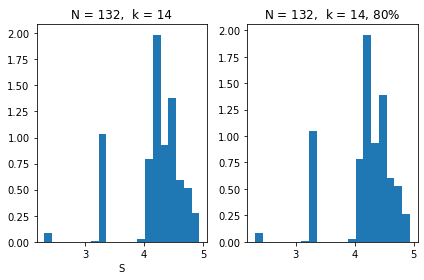

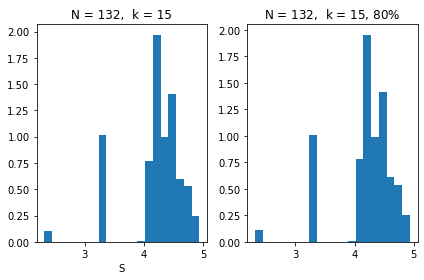

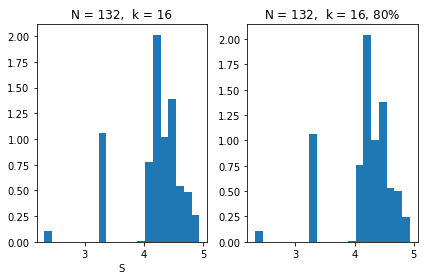

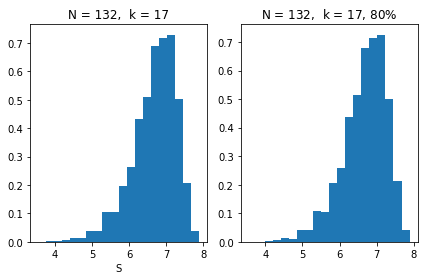

In [58]:
from matplotlib import pyplot as plt
L = 8
first_L = 4
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

print(first_non_convergence)
#number of figures with 2 computational steps, 0
number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence
partial_idx = maxiter[L-first_L] // 5
    
# 2 computational steps plot
#plot converged steps
for i in range(number_of_complete_figures):
    fig, axes = plt.subplots(1,2)
    for j,ax in enumerate(axes.flatten()):
        k = 2 * i +j
        ax.hist(results[L-first_L][k][1], density=True, bins=20)
        ax.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) )
        ax.set_xlabel("S")

    plt.tight_layout()
    #plt.savefig('partial_L_' + str(L) + "_" + str(i+1), dpi=300)
    plt.show()

    #last of the converged, makes it odd
if not even:
    k = first_non_convergence - 1
    plt.hist(results[L-first_L][k][1], density=True, bins=20)
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) )
    plt.xlabel("S")

    plt.tight_layout()
    #plt.savefig('partial_L_' + str(L) + "_" + str(i+2), dpi=300)
    plt.show()
    
# plot non converged
for k in range(first_non_convergence, max_k):
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.hist(results[L-first_L][k][1], density=True, bins=20)
    ax1.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    ax1.set_xlabel("S")
    ax2.hist(results[L-first_L][k][1][:-partial_idx], density=True, bins=20)
    ax2.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) +", 80$\%$" )
    plt.tight_layout()
    #plt.savefig()
    plt.show()

## Independent runs: L=8, N = 132, 12_000 vs 9_000

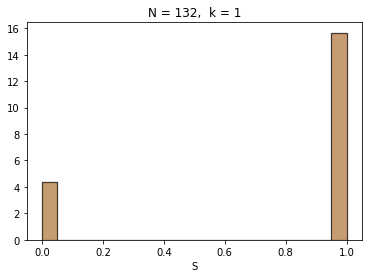

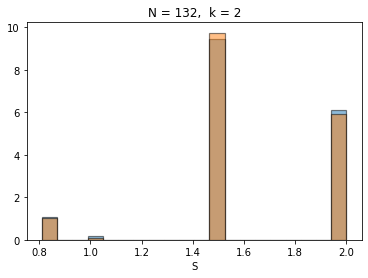

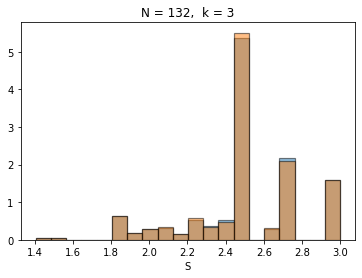

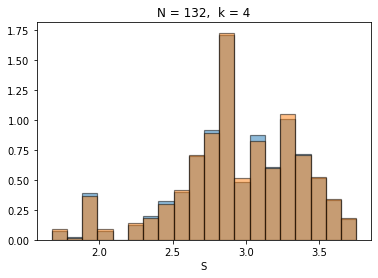

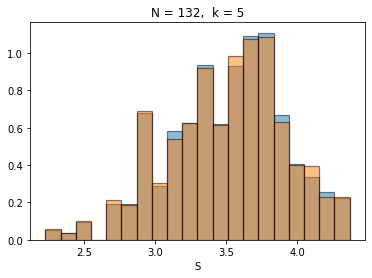

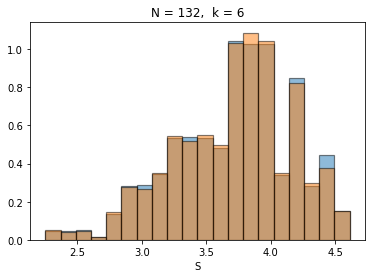

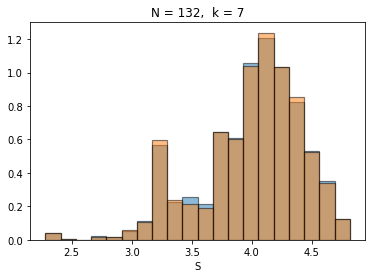

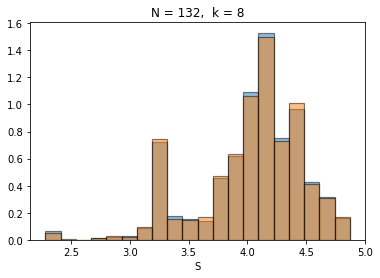

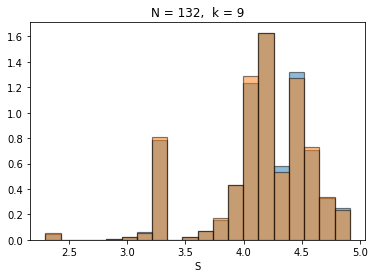

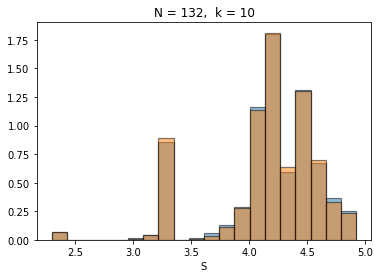

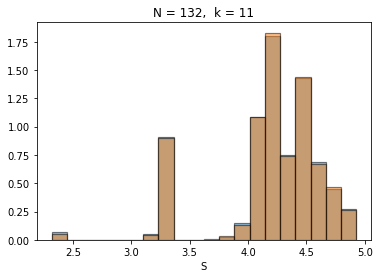

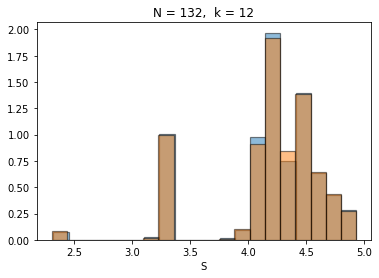

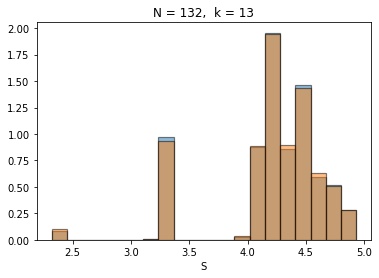

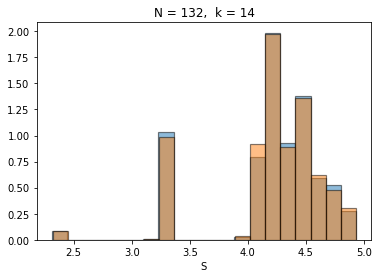

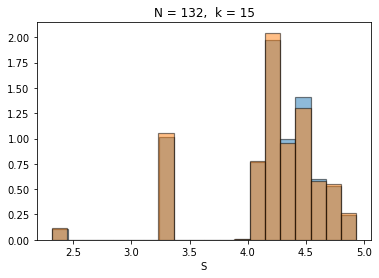

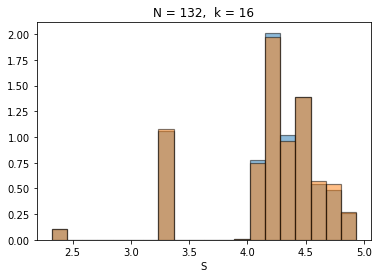

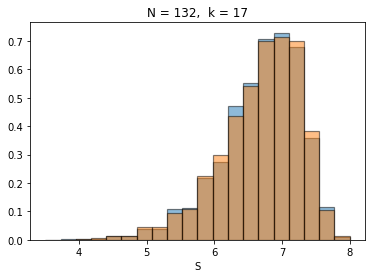

In [133]:
from matplotlib import pyplot as plt
L = 8
max_k = 2 * L + 1
kwargs = dict(density=True, stacked=True, bins=20, edgecolor='black', linewidth=1.2, alpha=0.5)

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence

rang = None
# plot non converged
for k in range(first_non_convergence, max_k):
    if k == max_k-1: rang=[3.5,8]
        
    plt.hist(results[L-first_L][k][1], **kwargs, range=rang)
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.hist(results_8_132_partial_9000[k][1], **kwargs, range=rang)
    plt.savefig("Independent_runs_132_k_" + str(k+1), dpi=300)
    plt.show()

In [125]:
base = (8-3.5)/20
h = [0.47,0.434]
tot = [12_000,9_000]
counts = [j*base*i for i,j in zip(tot,h)]
print(np.array(counts))
bars = [np.sqrt(i)for i in counts]
print(bars)

[1269.    878.85]
[35.62302626111375, 29.645404365601088]


In [132]:
print((counts[0]-3*bars[0])/(base*12_000), (counts[1]+3*bars[1])/(base*9_000))

0.43041885970987365 0.4779191175786683


In [164]:
## Convergence with hypotesis test

In [223]:
from scipy.stats import ks_2samp

print("Between simulations")
max_k = 2*8+1
for k in range(0,max_k):
    print(k+1,ks_2samp(results[4][k][1], results_8_132_partial_9000[k][1])[1] >.05)

percentage = 90
thrown = (100 - percentage)
print("With itself, " + str(percentage) +"%")
for l in range(first_L,9):
#for l in range(5,6):
    max_k = 2 * l + 1
    convergence = []
    for k in range(max_k):
        partial_idx = len(results[l-first_L][k][1]) * thrown // 100
        convergence.append(ks_2samp(results[l-first_L][k][1], results[l-first_L][k][1][:-partial_idx])[1])             
    print(l,np.all(np.array(convergence) > 0.05))
    #print(convergence)
    #print([(i,j) for i,j in enumerate(np.array(convergence)>0.05)])

Between simulations
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 False
16 True
17 True
With itself, 90%
4 True
5 True
6 True
7 True
8 True


(array([1.73160173, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 8.26839827]),
 array([-6.40685301e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

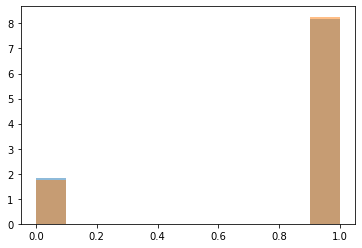

In [175]:
partial_idx = len(results[5-first_L][6][1]) // 4
plt.hist(results[5-first_L][6][1], density=True, alpha=0.5)
plt.hist(results[5-first_L][6][1][:-partial_idx], density=True, alpha=0.5)

In [179]:
test = [1,2,3,4]
print([(i,j) for i,j in enumerate(test)])

[(0, 1), (1, 2), (2, 3), (3, 4)]
